# GROOT Basic Application

## Entity and Relationship Extraction

### Natural Language Toolkit (NLTK)

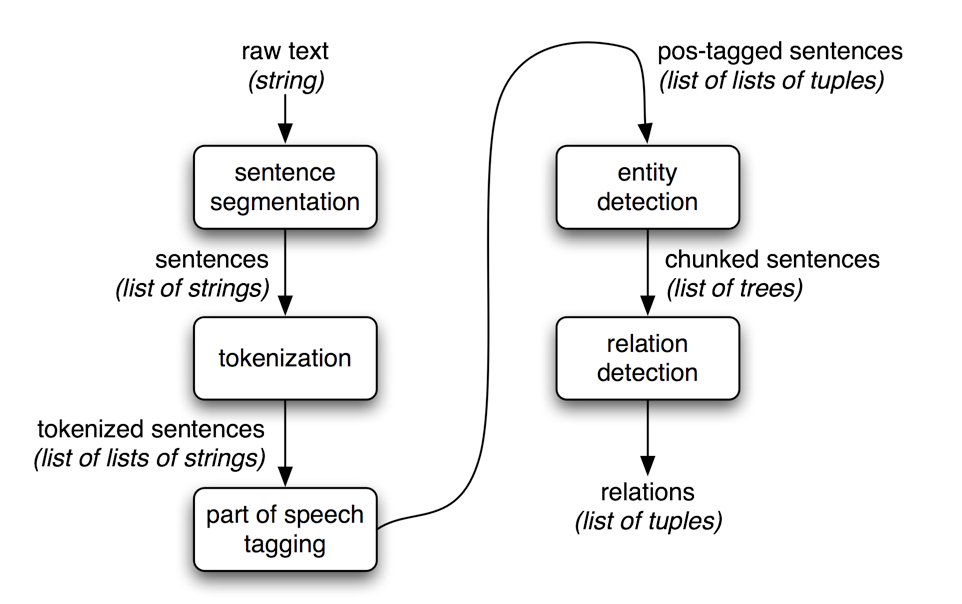

In [1]:
import pandas as pd
#read in the pickled document-term matrix
data = pd.read_pickle('corpus.pkl')

In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
#Tokenize the threat report
tokenize = word_tokenize(data.reports.loc['1'])
#print(tokenize)

Notice that there are alot of stop words (and, a, but, the, ...) present in the newly tokenized text. Some of them are not meaningful for this analysis. Let's remove some of the common ones in the english language.

In [3]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) #stop words in the english language
#stop_words

#remove stop words
filtered = [w for w in tokenize if not w in stop_words]
print(filtered)

['Alert', 'CrashOverride', 'Malware', 'Systems', 'Affected', 'Industrial', 'Control', 'Systems', 'Overview', 'The', 'National', 'Cybersecurity', 'Communications', 'Integration', 'Center', 'NCCIC', 'aware', 'public', 'reports', 'ESET', 'Dragos', 'outlining', 'new', 'highly', 'capable', 'Industrial', 'Controls', 'Systems', 'ICS', 'attack', 'platform', 'reportedly', 'used', 'critical', 'infrastructure', 'Ukraine', 'As', 'reported', 'ESET', 'Dragos', 'CrashOverride', 'malware', 'extensible', 'platform', 'could', 'used', 'target', 'critical', 'infrastructure', 'sectors', 'NCCIC', 'working', 'partners', 'validate', 'ESET', 'Dragos', 'analysis', 'develop', 'better', 'understanding', 'risk', 'new', 'malware', 'poses', 'US', 'critical', 'infrastructure', 'Although', 'activity', 'still', 'investigation', 'NCCIC', 'sharing', 'report', 'provide', 'organizations', 'detection', 'mitigation', 'recommendations', 'help', 'prevent', 'future', 'compromises', 'within', 'critical', 'infrastructure', 'netwo

In [4]:
from collections import Counter
Counter = Counter(filtered)
top_50 = Counter.most_common(50)
top_50

[('nocase', 25),
 ('systems', 21),
 ('malware', 20),
 ('fullword', 20),
 ('control', 18),
 ('ff', 16),
 ('operators', 16),
 ('access', 15),
 ('NCCIC', 14),
 ('Dragos', 14),
 ('network', 13),
 ('rule', 11),
 ('critical', 10),
 ('Inc', 10),
 ('ICS', 9),
 ('infrastructure', 9),
 ('organizations', 9),
 ('information', 9),
 ('may', 9),
 ('filesize', 9),
 ('CrashOverride', 8),
 ('The', 8),
 ('networks', 8),
 ('updates', 8),
 ('data', 8),
 ('public', 7),
 ('detect', 7),
 ('implement', 7),
 ('CRASHOVERRIDE', 7),
 ('possible', 7),
 ('accounts', 7),
 ('use', 7),
 ('activity', 6),
 ('detection', 6),
 ('system', 6),
 ('wide', 6),
 ('adversaries', 6),
 ('software', 6),
 ('plan', 6),
 ('Control', 5),
 ('attack', 5),
 ('used', 5),
 ('analysis', 5),
 ('IOCs', 5),
 ('conditionall', 5),
 ('actions', 5),
 ('This', 5),
 ('whitelisting', 5),
 ('authentication', 5),
 ('secure', 5)]

In [5]:
add_stop_words = [word for word, count in top_50 if count > 15]
print(add_stop_words)

['nocase', 'systems', 'malware', 'fullword', 'control', 'ff', 'operators']


In [6]:
from sklearn.feature_extraction import text
#update new stop words
new_stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
new_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [7]:
updated_text = [word for word in filtered if not word in new_stop_words]
print(updated_text)

['Alert', 'CrashOverride', 'Malware', 'Systems', 'Affected', 'Industrial', 'Control', 'Systems', 'Overview', 'The', 'National', 'Cybersecurity', 'Communications', 'Integration', 'Center', 'NCCIC', 'aware', 'public', 'reports', 'ESET', 'Dragos', 'outlining', 'new', 'highly', 'capable', 'Industrial', 'Controls', 'Systems', 'ICS', 'attack', 'platform', 'reportedly', 'used', 'critical', 'infrastructure', 'Ukraine', 'As', 'reported', 'ESET', 'Dragos', 'CrashOverride', 'extensible', 'platform', 'used', 'target', 'critical', 'infrastructure', 'sectors', 'NCCIC', 'working', 'partners', 'validate', 'ESET', 'Dragos', 'analysis', 'develop', 'better', 'understanding', 'risk', 'new', 'poses', 'US', 'critical', 'infrastructure', 'Although', 'activity', 'investigation', 'NCCIC', 'sharing', 'report', 'provide', 'organizations', 'detection', 'mitigation', 'recommendations', 'help', 'prevent', 'future', 'compromises', 'critical', 'infrastructure', 'networks', 'NCCIC', 'continues', 'work', 'interagency',

In [8]:
#Remove some other frequently occuring words
other = ['CRASHOVERRIDE','conditionall', 'NCCICCustomerServicehqdhsgov', 'reimport','import','hash','Inc','OPCexe','OPC','client','ports','ASDUu', 'pcmt','OPCClientDemodll','IncconditionpeexportsCrash','Exportauthor','Wiperauthor', 'SYSBASCONCOM','Exportauthor','Hashesauthor','dragoscrashoverrideconfigReadermetadescription','dragoscrashoverridemoduleStrings','dragoscrashoverrideconfigReadermetadescription','File','CRASHOVERRIDEauthor','MSTR','SLV','Unknown', 'settingAuthor','wip¬erauthor','dragoscrashoverrideserviceStompermetadescription','dragoscrashoverridewiperFileManipulationmetadescription','dragoscrashoverridewiperModuleRegistrymetadescription','rule','PROGRAMFILES','Parsingauthor','filesize','wide','eb','cf','dragoscrashoverrideweirdMutexmetadescription','mutex','ips','conditionfilesize','metadescription','pcmp','pcmi','pecharacteristics','dragoscrashoverrideexportingdllsmetadescription','dragoscrashoverridesuspciousmetadescription','wideconditionpeexportsCrash','dragoscrashoverridenamesearch','CrashOPCClientDemodll','hasloexe','haslodat','asciiconditionany','settingauthor','cin']
other

['CRASHOVERRIDE',
 'conditionall',
 'NCCICCustomerServicehqdhsgov',
 'reimport',
 'import',
 'hash',
 'Inc',
 'OPCexe',
 'OPC',
 'client',
 'ports',
 'ASDUu',
 'pcmt',
 'OPCClientDemodll',
 'IncconditionpeexportsCrash',
 'Exportauthor',
 'Wiperauthor',
 'SYSBASCONCOM',
 'Exportauthor',
 'Hashesauthor',
 'dragoscrashoverrideconfigReadermetadescription',
 'dragoscrashoverridemoduleStrings',
 'dragoscrashoverrideconfigReadermetadescription',
 'File',
 'CRASHOVERRIDEauthor',
 'MSTR',
 'SLV',
 'Unknown',
 'settingAuthor',
 'wip¬erauthor',
 'dragoscrashoverrideserviceStompermetadescription',
 'dragoscrashoverridewiperFileManipulationmetadescription',
 'dragoscrashoverridewiperModuleRegistrymetadescription',
 'rule',
 'PROGRAMFILES',
 'Parsingauthor',
 'filesize',
 'wide',
 'eb',
 'cf',
 'dragoscrashoverrideweirdMutexmetadescription',
 'mutex',
 'ips',
 'conditionfilesize',
 'metadescription',
 'pcmp',
 'pcmi',
 'pecharacteristics',
 'dragoscrashoverrideexportingdllsmetadescription',
 'dragos

In [9]:
last_batch_stop = new_stop_words.union(other)
print(last_batch_stop)

frozenset({'pecharacteristics', 'between', 'wideconditionpeexportsCrash', 'only', 'two', 'all', 'herein', 'you', 'except', 'he', 'same', 'whereas', 'another', 'a', 'from', 'OPCClientDemodll', 'formerly', 'take', 'wip¬erauthor', 'whither', 'fullword', 'thus', 'has', 'ie', 'anyhow', 'whereupon', 'on', 'IncconditionpeexportsCrash', 'ourselves', 'both', 'besides', 'settingAuthor', 'metadescription', 'full', 'every', 'seem', 'though', 'Exportauthor', 'call', 'MSTR', 'client', 'ports', 'there', 'twelve', 'nor', 'pcmp', 'amount', 'CRASHOVERRIDEauthor', 'me', 'still', 'cry', 'therein', 'mill', 'others', 'inc', 'whatever', 'rather', 'dragoscrashoverridesuspciousmetadescription', 'thereupon', 'name', 'an', 'of', 'indeed', 'often', 'show', 'whose', 'import', 'bottom', 'if', 'no', 'toward', 'etc', 'seeming', 'everything', 'conditionall', 'amongst', 'behind', 'Inc', 'namely', 'never', 'nocase', 'anyway', 'nothing', 'can', 'else', 'is', 'than', 'NCCICCustomerServicehqdhsgov', 'once', 'above', 'becom

In [10]:
final = [word for word in updated_text if not word in last_batch_stop]
print(final)

['Alert', 'CrashOverride', 'Malware', 'Systems', 'Affected', 'Industrial', 'Control', 'Systems', 'Overview', 'The', 'National', 'Cybersecurity', 'Communications', 'Integration', 'Center', 'NCCIC', 'aware', 'public', 'reports', 'ESET', 'Dragos', 'outlining', 'new', 'highly', 'capable', 'Industrial', 'Controls', 'Systems', 'ICS', 'attack', 'platform', 'reportedly', 'used', 'critical', 'infrastructure', 'Ukraine', 'As', 'reported', 'ESET', 'Dragos', 'CrashOverride', 'extensible', 'platform', 'used', 'target', 'critical', 'infrastructure', 'sectors', 'NCCIC', 'working', 'partners', 'validate', 'ESET', 'Dragos', 'analysis', 'develop', 'better', 'understanding', 'risk', 'new', 'poses', 'US', 'critical', 'infrastructure', 'Although', 'activity', 'investigation', 'NCCIC', 'sharing', 'report', 'provide', 'organizations', 'detection', 'mitigation', 'recommendations', 'help', 'prevent', 'future', 'compromises', 'critical', 'infrastructure', 'networks', 'NCCIC', 'continues', 'work', 'interagency',

#### Part of Speech Tagging

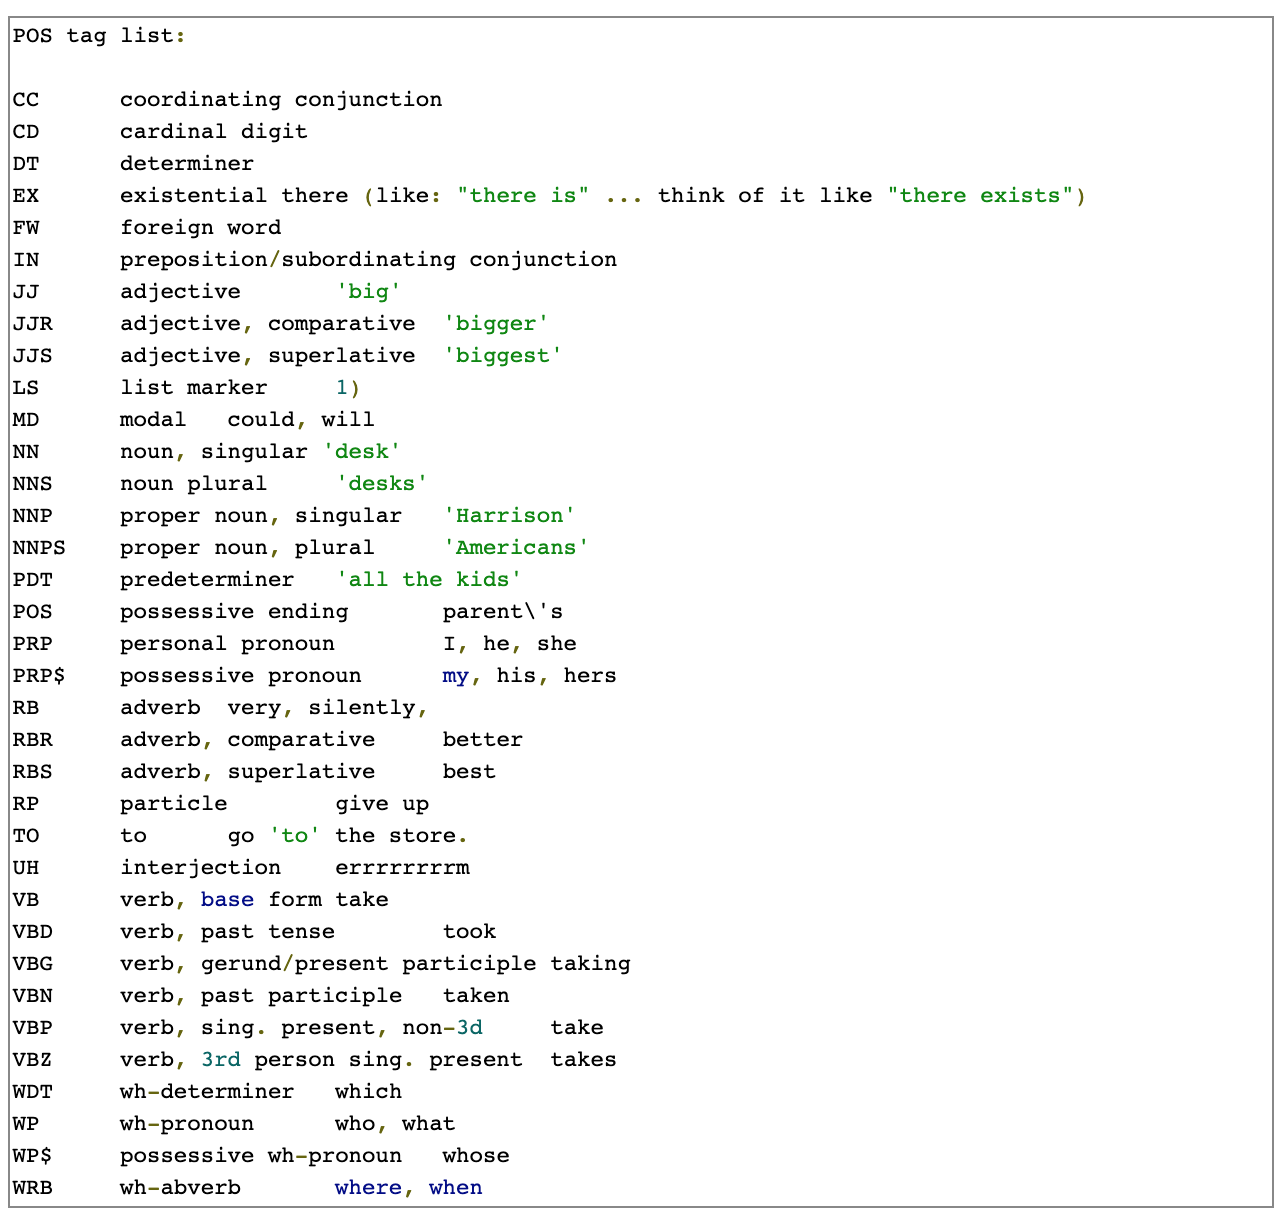

In [11]:
tagged = nltk.pos_tag(final)
print(tagged)

[('Alert', 'NNP'), ('CrashOverride', 'NNP'), ('Malware', 'NNP'), ('Systems', 'NNPS'), ('Affected', 'NNP'), ('Industrial', 'NNP'), ('Control', 'NNP'), ('Systems', 'NNP'), ('Overview', 'NNP'), ('The', 'DT'), ('National', 'NNP'), ('Cybersecurity', 'NNP'), ('Communications', 'NNP'), ('Integration', 'NNP'), ('Center', 'NNP'), ('NCCIC', 'NNP'), ('aware', 'JJ'), ('public', 'JJ'), ('reports', 'NNS'), ('ESET', 'NNP'), ('Dragos', 'NNP'), ('outlining', 'VBG'), ('new', 'JJ'), ('highly', 'RB'), ('capable', 'JJ'), ('Industrial', 'NNP'), ('Controls', 'NNP'), ('Systems', 'NNPS'), ('ICS', 'NNP'), ('attack', 'NN'), ('platform', 'NN'), ('reportedly', 'RB'), ('used', 'VBD'), ('critical', 'JJ'), ('infrastructure', 'NN'), ('Ukraine', 'NNP'), ('As', 'IN'), ('reported', 'VBN'), ('ESET', 'NNP'), ('Dragos', 'NNP'), ('CrashOverride', 'NNP'), ('extensible', 'JJ'), ('platform', 'NN'), ('used', 'VBN'), ('target', 'NN'), ('critical', 'JJ'), ('infrastructure', 'NN'), ('sectors', 'NNS'), ('NCCIC', 'NNP'), ('working', 

In [12]:
grammar = r"""
    NP: {<DT|JJ|NN.*>+}
    PP: {<IN><NP>}
    VP: {<VB.*><NP|PP|CLAUSE>+$}
    CLAUSE: {<NP><VP>}
    """

cp = nltk.RegexpParser(grammar)

In [13]:
print(cp.parse(tagged))

(S
  (NP
    Alert/NNP
    CrashOverride/NNP
    Malware/NNP
    Systems/NNPS
    Affected/NNP
    Industrial/NNP
    Control/NNP
    Systems/NNP
    Overview/NNP
    The/DT
    National/NNP
    Cybersecurity/NNP
    Communications/NNP
    Integration/NNP
    Center/NNP
    NCCIC/NNP
    aware/JJ
    public/JJ
    reports/NNS
    ESET/NNP
    Dragos/NNP)
  outlining/VBG
  (NP new/JJ)
  highly/RB
  (NP
    capable/JJ
    Industrial/NNP
    Controls/NNP
    Systems/NNPS
    ICS/NNP
    attack/NN
    platform/NN)
  reportedly/RB
  used/VBD
  (NP critical/JJ infrastructure/NN Ukraine/NNP)
  As/IN
  reported/VBN
  (NP
    ESET/NNP
    Dragos/NNP
    CrashOverride/NNP
    extensible/JJ
    platform/NN)
  used/VBN
  (NP target/NN critical/JJ infrastructure/NN sectors/NNS NCCIC/NNP)
  working/VBG
  (NP partners/NNS validate/JJ ESET/NNP Dragos/NNP analysis/NN)
  develop/VB
  better/RBR
  understanding/VBG
  (NP risk/JJ new/JJ poses/NNS US/NNP critical/JJ infrastructure/NN)
  (PP Although/IN (NP

In [14]:
print(nltk.ne_chunk(tagged, binary=True))

(S
  (NE Alert/NNP)
  CrashOverride/NNP
  Malware/NNP
  Systems/NNPS
  (NE Affected/NNP Industrial/NNP Control/NNP Systems/NNP)
  Overview/NNP
  The/DT
  (NE
    National/NNP
    Cybersecurity/NNP
    Communications/NNP
    Integration/NNP
    Center/NNP)
  NCCIC/NNP
  aware/JJ
  public/JJ
  reports/NNS
  (NE ESET/NNP Dragos/NNP)
  outlining/VBG
  new/JJ
  highly/RB
  capable/JJ
  Industrial/NNP
  Controls/NNP
  Systems/NNPS
  ICS/NNP
  attack/NN
  platform/NN
  reportedly/RB
  used/VBD
  critical/JJ
  infrastructure/NN
  Ukraine/NNP
  As/IN
  reported/VBN
  (NE ESET/NNP Dragos/NNP)
  CrashOverride/NNP
  extensible/JJ
  platform/NN
  used/VBN
  target/NN
  critical/JJ
  infrastructure/NN
  sectors/NNS
  NCCIC/NNP
  working/VBG
  partners/NNS
  validate/JJ
  (NE ESET/NNP Dragos/NNP)
  analysis/NN
  develop/VB
  better/RBR
  understanding/VBG
  risk/JJ
  new/JJ
  poses/NNS
  (NE US/NNP)
  critical/JJ
  infrastructure/NN
  Although/IN
  activity/NN
  investigation/NN
  NCCIC/NNP
  sharing

In [15]:
print(nltk.ne_chunk(tagged))

(S
  (PERSON Alert/NNP)
  (ORGANIZATION
    CrashOverride/NNP
    Malware/NNP
    Systems/NNPS
    Affected/NNP
    Industrial/NNP
    Control/NNP
    Systems/NNP)
  Overview/NNP
  The/DT
  (ORGANIZATION
    National/NNP
    Cybersecurity/NNP
    Communications/NNP
    Integration/NNP
    Center/NNP)
  NCCIC/NNP
  aware/JJ
  public/JJ
  reports/NNS
  (ORGANIZATION ESET/NNP)
  Dragos/NNP
  outlining/VBG
  new/JJ
  highly/RB
  capable/JJ
  Industrial/NNP
  (ORGANIZATION Controls/NNP Systems/NNPS)
  ICS/NNP
  attack/NN
  platform/NN
  reportedly/RB
  used/VBD
  critical/JJ
  infrastructure/NN
  (PERSON Ukraine/NNP)
  As/IN
  reported/VBN
  (ORGANIZATION ESET/NNP Dragos/NNP)
  CrashOverride/NNP
  extensible/JJ
  platform/NN
  used/VBN
  target/NN
  critical/JJ
  infrastructure/NN
  sectors/NNS
  NCCIC/NNP
  working/VBG
  partners/NNS
  validate/JJ
  (ORGANIZATION ESET/NNP Dragos/NNP)
  analysis/NN
  develop/VB
  better/RBR
  understanding/VBG
  risk/JJ
  new/JJ
  poses/NNS
  (GSP US/NNP)
 